In [1]:
from lithops import Storage,storage
from lithops.multiprocessing import Pool
from itertools import product
import lithops
import json
import io
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stg = Storage()
data = stg.get_object('analysis.data', 'processeddata/sentiments.csv').decode()
data = io.StringIO(data)
df = pd.read_csv(data, sep=",")
print(df)

                        Id        Date  Retweet           Location  Sentiment
0      1220910820378337280  2020-01-25      1.0       Vegas Strong     0.4939
1      1221750876538396672  2020-01-27      1.0    Warszawa Polska     0.0000
2      1221831050961145859  2020-01-27      1.0      hiroshima JPN     0.3182
3      1221836638084456448  2020-01-27      1.0                NaN    -0.5994
4      1221839402164293632  2020-01-27      1.0      United States     0.0000
...                    ...         ...      ...                ...        ...
75102  1393758103720562689  2021-05-16      1.0                NaN    -0.8225
75103  1393763502058217473  2021-05-16      1.0                NaN    -0.7269
75104  1393768387071778822  2021-05-16      1.0                NaN    -0.4019
75105  1393773076286869504  2021-05-16      1.0  God's own country     0.0000
75106  1393777586602450945  2021-05-16      1.0                NaN     0.0000

[75107 rows x 5 columns]


In [64]:
def average(date, df):
    mean = df.loc[df['Date'] == date]['Sentiment'].mean()
    return(mean)

In [53]:
print(average('2020-03-04'))

0.002894117647058819


<AxesSubplot:xlabel='x', ylabel='y'>

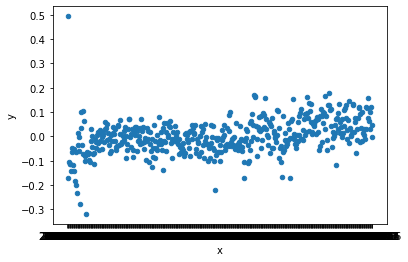

In [33]:
daySent = df[['Sentiment']].groupby(df['Date'],axis=0).mean()["Sentiment"]
dates = df['Date'].unique()
#rint(daySent)
#daySent.plot(x="Name", y="Sentiment", kind="scatter")
d = pd.DataFrame({'x':dates, 'y':daySent})
d.plot('Date', 'Sentiment', kind='scatter')

In [37]:
cat_totals = df.groupby("Location")["Sentiment"].mean().sort_values()
#cat_totals.plot(kind="barh", fontsize=4)
print(cat_totals)

Location
SeattleCalifornia and Montana   -0.9876
To infinity and Beyond          -0.9855
Oceania                         -0.9842
Outer space                     -0.9840
USA/TN                          -0.9823
                                  ...  
Thái Nguyên Việt Nam             0.9929
bts⁷ txt⁵ en-⁷                   0.9929
Reggie's Bar Tangiers            0.9970
Bots World                       0.9983
DM for promotions.                  NaN
Name: Sentiment, Length: 21367, dtype: float64
